In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths.csv')

In [3]:
data.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582


In [5]:
data.tail(7)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
44434,12/24/2020,07/16/2020,18556,641,44,9
44435,12/24/2020,10/16/2020,15812,570,45,0
44436,12/24/2020,06/18/2020,17785,605,76,5
44437,12/24/2020,07/08/2020,19812,737,62,8
44438,12/24/2020,03/16/2020,4951,2342,503,140
44439,12/24/2020,12/14/2020,21700,1758,115,6
44440,12/24/2020,11/20/2020,21672,1202,91,7


In [6]:
data.columns

Index(['extract_date', 'specimen_date', 'Number_tested', 'Number_confirmed',
       'Number_hospitalized', 'Number_deaths'],
      dtype='object')

In [7]:
data.shape

(44441, 6)

In [8]:
data.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,44441.000000,44441.000000,44441.000000,44441.000000
mean,10264.597579,1292.182894,312.771810,103.588736
std,6176.353680,1632.767311,516.012254,195.873226
min,1.000000,0.000000,0.000000,0.000000
25%,6255.000000,229.000000,25.000000,2.000000
50%,9625.000000,454.000000,50.000000,6.000000
75%,15698.000000,1899.000000,301.000000,88.000000
max,24172.000000,6502.000000,2016.000000,853.000000


In [9]:
data.isnull().sum()

extract_date           0
specimen_date          0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64

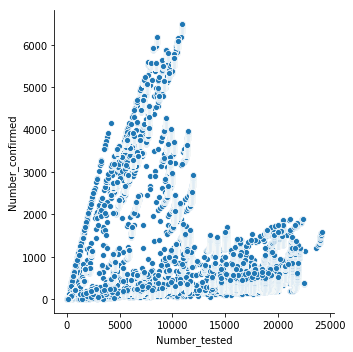

In [10]:
sns.relplot(x='Number_tested', y='Number_confirmed', data=data)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
train = data.drop(['Number_hospitalized', 'Number_deaths', 'specimen_date', 'extract_date'], axis=1)
test = data['Number_deaths']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size= 0.3, random_state=2)

In [20]:
regr = LinearRegression()

In [21]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
pred = regr.predict(X_test)

In [23]:
pred

array([-11.61380345, -22.33540196, 647.93534253, ...,  -4.28675798,
       400.04367058,  -7.31111861])

In [24]:
regr.score(X_test, y_test)

0.8946736861490011